# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_data = pd.merge(mouse_metadata,study_results,on = "Mouse ID",how = 'outer')
# Display the data table for preview
combine_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
number_mice=combine_data["Mouse ID"].nunique()
print(f"There are {number_mice} mice.")

There are 249 mice.


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = combine_data[combine_data.duplicated(["Mouse ID","Timepoint"])]
duplicated_mice_ID = duplicated_mice["Mouse ID"].unique()[0]
duplicated_mice_ID

'g989'

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
combine_data.loc[(combine_data['Mouse ID']=='g989'),:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine_data.loc[combine_data["Mouse ID"] != "g989", :]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
group_data = clean_df.groupby("Drug Regimen")
mean = group_data["Tumor Volume (mm3)"].mean()
median = group_data["Tumor Volume (mm3)"].median()
var = group_data["Tumor Volume (mm3)"].var()
std = group_data["Tumor Volume (mm3)"].std()
sem = group_data["Tumor Volume (mm3)"].sem(ddof = 1)

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
                      "Mean" : mean,
                      "Median" : median,
                      "Variance" : var,
                      "Standard Deviation" : std,
                      "SEM" :sem})
summary_df.head()


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg_df = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg_df.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

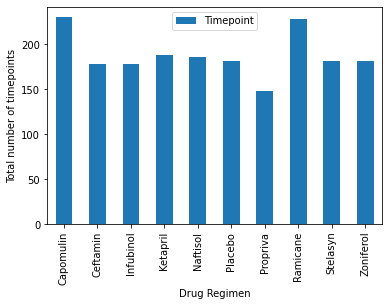

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

total_timepoints=clean_df.groupby('Drug Regimen').count()[['Timepoint']]
total_timepoints.plot(kind='bar')
plt.ylabel('Total number of timepoints')
plt.show()

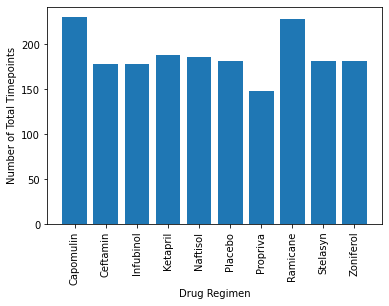

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drug_regimen=clean_df['Drug Regimen'].sort_values().unique()
timepoint=group_data['Timepoint'].count()
plt.bar(drug_regimen,timepoint)
plt.xticks(rotation="vertical")
plt.ylabel("Number of Total Timepoints", fontsize = 10)
plt.xlabel("Drug Regimen", fontsize = 10)
plt.show()

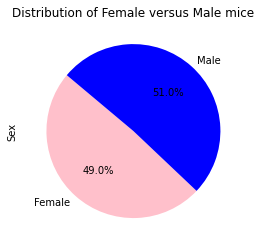

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_gender = clean_df.groupby("Sex")
gender_number = pd.DataFrame(mice_gender["Sex"].count())
gender_number.plot(kind='pie',y='Sex', title="Distribution of Female versus Male mice",startangle=140,\
                        autopct='%1.1f%%',shadow=False, fontsize=10, colors =["pink","blue"],legend =False)
plt.show()

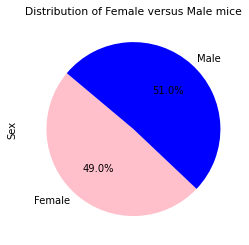

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_number["Sex"], labels=list(gender_number.index.values), colors=["pink", "blue"],
        autopct="%1.1f%%", shadow=False, startangle=140)
plt.rcParams['font.size'] = 9
plt.title("Distribution of Female versus Male mice")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
group_data_ID = clean_df.groupby("Mouse ID")
max_timepoint = group_data_ID["Timepoint"].max()
max_timepoint_df = pd.DataFrame(max_timepoint,columns = ["Timepoint"])

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_data = pd.merge(clean_df,max_timepoint_df,on = ["Mouse ID","Timepoint"],how = 'inner')
new_data = new_data[new_data["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]
new_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df = new_data.loc[new_data["Drug Regimen"] == drug]
    tumor.append(treatment_df["Tumor Volume (mm3)"])
    
    
    # Determine outliers using upper and lower bounds
for i in range(4):
    quartiles = tumor[i].quantile([0.25,0.5,0.75])
    lowerq = tumor[i].quantile(0.25)
    upperq = tumor[i].quantile(0.75)
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"For {treatments[i]},")
    print(f"value below {lower_bound} could be outliers.")
    print(f"value above {upper_bound} could be outliers.")

For Capomulin,
value below 20.70456164999999 could be outliers.
value above 51.83201549 could be outliers.
For Ramicane,
value below 17.912664470000003 could be outliers.
value above 54.30681135 could be outliers.
For Infubinol,
value below 36.83290494999999 could be outliers.
value above 82.74144559000001 could be outliers.
For Ceftamin,
value below 25.355449580000002 could be outliers.
value above 87.66645829999999 could be outliers.


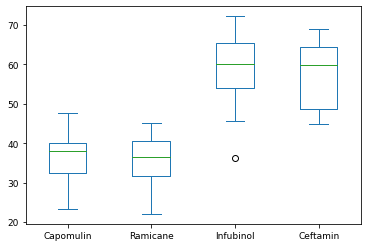

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

data = pd.DataFrame({"Capomulin": tumor[0], "Ramicane":tumor[1],
                    "Infubinol":tumor[2], "Ceftamin":tumor[3]})
ax = data[["Capomulin", "Ramicane","Infubinol", "Ceftamin"]].plot(kind='box',)                                                                 
plt.show()

## Line and Scatter Plots

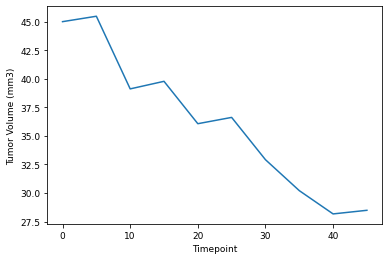

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

x401_capomulin_mouse_data = clean_df.loc[clean_df["Mouse ID"] == "x401"]
plt.plot(x401_capomulin_mouse_data["Timepoint"],x401_capomulin_mouse_data["Tumor Volume (mm3)"],label = 'Mouse Treatment with Capomulin')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()


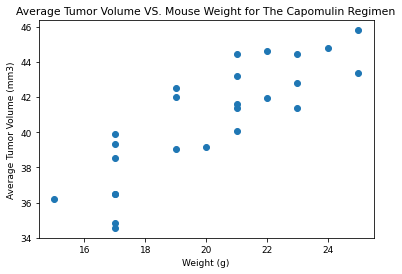

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Capomulin_regimen = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_group = Capomulin_regimen.groupby(['Mouse ID']).mean()

tumor_volume_avg = capomulin_group['Tumor Volume (mm3)']
tumor_wheigt_avg = capomulin_group['Weight (g)']

plt.scatter(tumor_wheigt_avg, tumor_volume_avg)
            
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume VS. Mouse Weight for The Capomulin Regimen")
plt.show()


## Correlation and Regression

The correlation coefficient for the mouse weight and the average tumor volume is 0.84


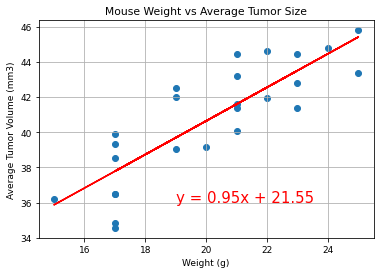

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(tumor_volume_avg,tumor_wheigt_avg)
print(f"The correlation coefficient for the mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(tumor_wheigt_avg, tumor_volume_avg)
regressvalues = slope * tumor_wheigt_avg  + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(tumor_wheigt_avg,tumor_volume_avg)
plt.plot(tumor_wheigt_avg,regressvalues,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid()
plt.title("Mouse Weight vs Average Tumor Size")
plt.annotate(line_eq,(19,36), color="red", fontsize=15)
plt.show()